In [1]:
"""
====================================
Outlier detection on a real data set
====================================

This example illustrates the need for robust covariance estimation
on a real data set. It is useful both for outlier detection and for
a better understanding of the data structure.

We selected two sets of two variables from the Boston housing data set
as an illustration of what kind of analysis can be done with several
outlier detection tools. For the purpose of visualization, we are working
with two-dimensional examples, but one should be aware that things are
not so trivial in high-dimension, as it will be pointed out.

In both examples below, the main result is that the empirical covariance
estimate, as a non-robust one, is highly influenced by the heterogeneous
structure of the observations. Although the robust covariance estimate is
able to focus on the main mode of the data distribution, it sticks to the
assumption that the data should be Gaussian distributed, yielding some biased
estimation of the data structure, but yet accurate to some extent.
The One-Class SVM does not assume any parametric form of the data distribution
and can therefore model the complex shape of the data much better.

First example
-------------
The first example illustrates how robust covariance estimation can help
concentrating on a relevant cluster when another one exists. Here, many
observations are confounded into one and break down the empirical covariance
estimation.
Of course, some screening tools would have pointed out the presence of two
clusters (Support Vector Machines, Gaussian Mixture Models, univariate
outlier detection, ...). But had it been a high-dimensional example, none
of these could be applied that easily.

Second example
--------------
The second example shows the ability of the Minimum Covariance Determinant
robust estimator of covariance to concentrate on the main mode of the data
distribution: the location seems to be well estimated, although the covariance
is hard to estimate due to the banana-shaped distribution. Anyway, we can
get rid of some outlying observations.
The One-Class SVM is able to capture the real data structure, but the
difficulty is to adjust its kernel bandwidth parameter so as to obtain
a good compromise between the shape of the data scatter matrix and the
risk of over-fitting the data.

"""

'\n====================================\nOutlier detection on a real data set\n====================================\n\nThis example illustrates the need for robust covariance estimation\non a real data set. It is useful both for outlier detection and for\na better understanding of the data structure.\n\nWe selected two sets of two variables from the Boston housing data set\nas an illustration of what kind of analysis can be done with several\noutlier detection tools. For the purpose of visualization, we are working\nwith two-dimensional examples, but one should be aware that things are\nnot so trivial in high-dimension, as it will be pointed out.\n\nIn both examples below, the main result is that the empirical covariance\nestimate, as a non-robust one, is highly influenced by the heterogeneous\nstructure of the observations. Although the robust covariance estimate is\nable to focus on the main mode of the data distribution, it sticks to the\nassumption that the data should be Gaussian 

In [8]:
print(__doc__)

Automatically created module for IPython interactive environment


In [9]:
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause


In [10]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_boston

In [11]:
# Get data
X1 = load_boston()['data'][:, [8, 10]]  # two clusters
X2 = load_boston()['data'][:, [5, 12]]  # "banana"-shaped

In [12]:
# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.,contamination=0.261),
    "Robust Covariance (Minimum Covariance Determinant)":EllipticEnvelope(contamination=0.261),
    "OCSVM": OneClassSVM(nu=0.261, gamma=0.05)}
colors = ['m', 'g', 'b']
legend1 = {}
legend2 = {}



In [13]:
# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(-8, 28, 500), np.linspace(3, 40, 500))
xx2, yy2 = np.meshgrid(np.linspace(3, 10, 500), np.linspace(-5, 45, 500))


KeyboardInterrupt: 

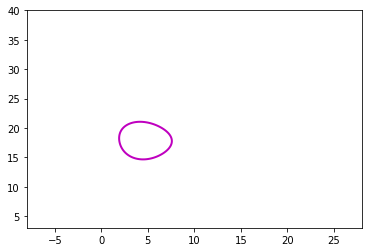

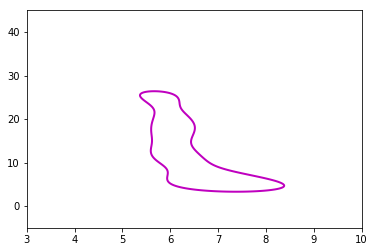

In [14]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])
    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection on a real data set (boston housing)")
plt.scatter(X1[:, 0], X1[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate("several confounded points", xy=(24, 19),
             xycoords="data", textcoords="data",
             xytext=(13, 10), bbox=bbox_args, arrowprops=arrow_args)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[2].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("accessibility to radial highways")
plt.xlabel("pupil-teacher ratio by town")

legend2_values_list = list(legend2.values())
legend2_keys_list = list(legend2.keys())

plt.figure(2)  # "banana" shape
plt.title("Outlier detection on a real data set (boston housing)")
plt.scatter(X2[:, 0], X2[:, 1], color='black')
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.legend((legend2_values_list[0].collections[0],
            legend2_values_list[1].collections[0],
            legend2_values_list[2].collections[0]),
           (legend2_keys_list[0], legend2_keys_list[1], legend2_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("% lower status of the population")
plt.xlabel("average number of rooms per dwelling")

plt.show()